### **ロジスティック回帰 (Logistic Regression)**

#### **回帰から分類へ…**

線形回帰を通じて連続的な値を予測するモデルを構築することができますが、場合によってはデータのラベルがカテゴリ型の場合もあります。たとえば、「男性/女性」や「犬/猫」といったカテゴリ型データを扱う際には、これらのカテゴリラベルを0と1に置き換えて考えることができます。




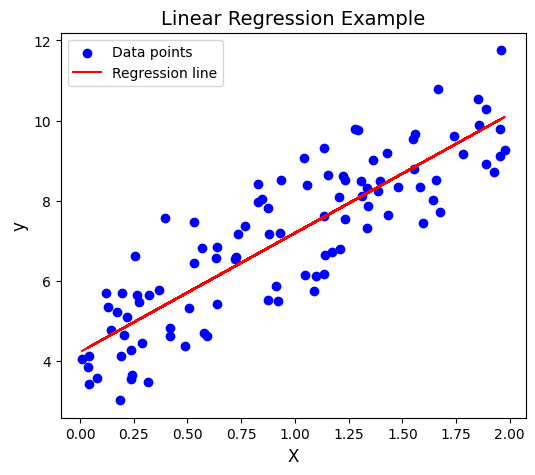

In [5]:
# Re-importing necessary libraries for the linear regression code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data for linear regression
np.random.seed(0)
X_lin = 2 * np.random.rand(100, 1)  # Random X values between 0 and 2
y_lin = 4 + 3 * X_lin + np.random.randn(100, 1)  # y = 4 + 3x + Gaussian noise

# Fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_lin, y_lin)
y_pred = lin_reg.predict(X_lin)

# Plot the data and the regression line
plt.figure(figsize=(6, 5))
plt.scatter(X_lin, y_lin, color='blue', label='Data points')
plt.plot(X_lin, y_pred, color='red', label='Regression line')

# Labels and title
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Linear Regression Example', fontsize=14)
plt.legend()

# Show the plot
plt.show()


#### **カテゴリ型データに適した関数**

カテゴリ型データのモデルを構築するためには、特定の値を基準に0から1に急激に変化する形のS字カーブを持つ関数が適しています。その代表例がシグモイド関数 (Sigmoid Function) です。

シグモイド関数の式は以下の通りです：

$$
S(x) = \frac{1}{1 + \exp(-x)} \tag{1}
$$

シグモイド関数は、独立変数の値に応じて結果を0から1の確率にマッピングし、この確率が0.5以上ならクラス1に、そうでなければクラス0に分類することができます。



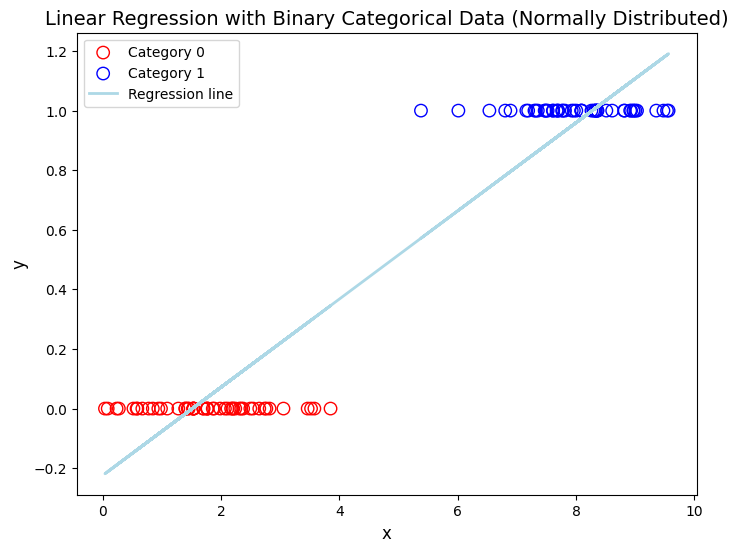

In [9]:
# Generate new synthetic binary categorical data following normal distributions
np.random.seed(42)
x_cat = np.linspace(-2, 12, 100).reshape(-1, 1)  # X values from -2 to 12
y_cat = (x_cat > 5).astype(int)  # Binary outcome: 0 if x <= 5, 1 if x > 5

# Generate normal distributions for category 0 and 1
x_cat_0 = np.random.normal(loc=2, scale=1, size=50)  # Normally distributed around 2 for category 0
x_cat_1 = np.random.normal(loc=8, scale=1, size=50)  # Normally distributed around 8 for category 1

# Concatenate the data and create the binary output
x_cat = np.concatenate([x_cat_0, x_cat_1]).reshape(-1, 1)
y_cat = np.concatenate([np.zeros(50), np.ones(50)])

# Fit a linear regression model to the data
model_cat = LinearRegression()
model_cat.fit(x_cat, y_cat)
y_pred_cat = model_cat.predict(x_cat)

# Plot the data points (0 = red circle, 1 = blue circle) and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_cat[y_cat == 0], y_cat[y_cat == 0], edgecolor='red', facecolor='none', s=80, label='Category 0')
plt.scatter(x_cat[y_cat == 1], y_cat[y_cat == 1], edgecolor='blue', facecolor='none', s=80, label='Category 1')
plt.plot(x_cat, y_pred_cat, color='lightblue', label='Regression line', linewidth=2)

# Labels and title
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Linear Regression with Binary Categorical Data (Normally Distributed)', fontsize=14)
plt.legend()

# Show the plot
plt.show()


線形回帰メソッドを適用した場合でも、$ y = ax + b \geq 0.5 $の場合は1に分類し、それ以外は0に分類することができます。

しかし、カテゴリカルデータに対して回帰分析を行う場合は、次のような関数を使用することで、より良い結果が得られるでしょう。

つまり、線形モデルよりもカテゴリカルデータに適したモデルを考えるべきです。

カテゴリカルデータに対するモデルを構築するために必要な関数は、下の図に示すように、ある値を超えるまでは0を、超えた後は1の値を持つ形の関数でなければなりません。



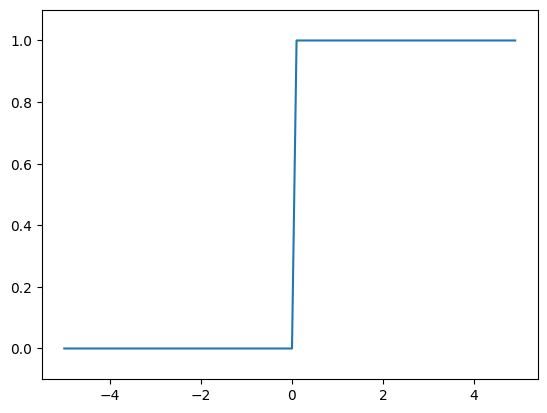

In [11]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# ステップ関数
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

#### **モデルの構築とエラーファンクションの定義**

シグモイド関数を用いてロジスティック回帰モデルを構築するためには、関数のパラメータ $ a $ と $ b $ を設定し、これを通じて予測された値 $ P $ と実際のラベル $ y $ の間のエラーを最小化する方法で最適なパラメータを見つけます。

ロジスティック回帰のエラーファンクション（損失関数）は次のように定義されます：

$$
E(y, P) = - (y \log(P) + (1 - y) \log(1 - P)) \tag{2}
$$

この式は、 $ y = 1 $ の場合、 $ P $ が0に近づくとエラー値が大きくなり、 $ y = 0 $ の場合、 $ P $ が1に近づくとエラー値が大きくなる構造になっています。

#### **エラーに対する勾配（Gradient）の計算**

パラメータを更新するためにはエラーファンクションに対する勾配を計算します。そのために、変数をベクトル化し、勾配降下法を適用して最適なパラメータを探します。

エラーファンクション $ E $ のパラメータ $ \theta $ に対する偏微分は以下の通りです：

$$
\frac{\partial E}{\partial \theta} = (P - y) X
$$

ここで、 $ X $ は入力変数のベクトル、 $ P $ はモデルの予測確率です。この微分式を利用してパラメータ $ a $ と $ b $ に対する偏微分もそれぞれ求めることができます。

#### **回帰モデル構築の結果**

このプロセスを通じて、勾配降下法を用いて最適な $ a $ と $ b $ を求めることで、カテゴリ型データに適したシグモイド関数の形状と位置を得ることができます。

上記のプロセスは、pythonで実装でき、この方法でロジスティック回帰モデルを学習させ、さまざまな分類問題に応用することができます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# xの範囲を設定
x = np.linspace(-10, 10, 400)
# シグモイド関数の値を計算
y = sigmoid(x)

# グラフの描画
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()

### **誤差関数（ロス関数、損失関数、コスト関数）の定義**

モデルが決定したので、次にエラーファンクションを定義し、これを最小化することでパラメータを決定します。

今回扱っている問題はバイナリ分類であり、出力は0または1のどちらかに定まります。この点が線形回帰と異なり、分類問題では答えが正しいか間違っているかの二択になる点です。

そのため、正解を予測した場合にはエラーの値を0にし、間違った場合にはエラーの値をできるだけ大きくします。

式 (2) から得られる結果を $ P $ と呼びます。これはラベルに対する確率値を出力するものとみなすことができます。例えば、$ P $ の値が0.5以上であればラベルを1と予測し、それ未満であればラベルを0と予測します。

したがって、モデルの出力関数は以下のようになります：

$$
P = \frac{1}{1 + \exp(-(ax + b))} \tag{3}
$$

私たちが求めるのは、ラベル $ y $ が1の時に $ P $ の値が0だとエラーが大きくなり、逆に $ y $ が0の時に $ P $ の値が1だとエラーが大きくなる関数です。これをログ関数を使って表現します。ログ関数の性質は以下の通りです：

$$
\lim_{x \to 0^+} \log(x) = -\infty \quad \text{および} \quad \log(1) = 0 \tag{4}
$$

これを利用して、誤差を以下のように定義します：

$$
E(y, P) =
\begin{cases}
- \log(P) & \text{if } y = 1 \\
- \log(1 - P) & \text{if } y = 0
\end{cases} \tag{5}
$$

式 (5) を考えると、$ y = 1 $ の場合、$ P $ が0なら誤差は無限大になり、$ P $ が1なら誤差は0になります。また、$ y = 0 $ の場合、$ P $ が0なら誤差は0ですが、$ P $ が1なら誤差は無限大になります。

この特性から、分類問題の $ y $ は0または1の値のみを取るため、式 (5) は以下のように1行で表現できます：

$$
E(y, P) = - (y \log(P) + (1 - y) \log(1 - P)) \tag{6}
$$

この誤差関数（ロス関数）により、分類問題において正しい予測をした場合には誤差が小さく、誤った予測をした場合には誤差が大きくなり、適切なパラメータを学習することができます。


### 誤差に関する勾配計算

#### $ P $ に関する偏微分計算

計算を簡単にするため、次のように変数をベクトル化しましょう。

$$
X = \begin{bmatrix} x \\ 1 \end{bmatrix} \tag{7}
$$

$$
\theta = \begin{bmatrix} a \\ b \end{bmatrix} \tag{8}
$$

したがって、$ ax + b $ は次のように表現できます。

$$
\theta^T X = \begin{bmatrix} a & b \end{bmatrix} \begin{bmatrix} x \\ 1 \end{bmatrix} \tag{9}
$$

まず、$ P(X, \theta) = \frac{1}{1 + \exp(-\theta^T X)} $ とすると、

$$
\frac{\partial P}{\partial \theta} = \frac{\partial}{\partial \theta} \left( \frac{1}{1 + \exp(-\theta^T X)} \right) \tag{10}
$$

分子式の形に対する微分を適用すると、

$$
= - \frac{(1 + \exp(-\theta^T X))'}{(1 + \exp(-\theta^T X))^2} \tag{11}
$$

ここで、$ 1 + \exp(-\theta^T X) $ を $ \theta $ に関して微分します。

$$
= - \frac{\exp(-\theta^T X) \cdot (-X)}{(1 + \exp(-\theta^T X))^2} \tag{12}
$$

符号を整理すると次のようになります。

$$
= \frac{\exp(-\theta^T X) \cdot X}{(1 + \exp(-\theta^T X))^2} \tag{13}
$$

ここで、分母の二乗項を分けて書くと次のようになります。

$$
= \frac{\exp(-\theta^T X) \cdot X}{(1 + \exp(-\theta^T X)) \cdot (1 + \exp(-\theta^T X))} \tag{14}
$$

したがって、さらに分解すると次のようになります。

$$
= \left(\frac{1}{1 + \exp(-\theta^T X)}\right) \cdot \left(\frac{\exp(-\theta^T X)}{1 + \exp(-\theta^T X)}\right) \cdot X \tag{15}
$$

ここで、第二項は $ 1 $ を足しても引いても結果は変わらないので、

$$
= \left(\frac{1}{1 + \exp(-\theta^T X)}\right) \cdot \left(\frac{1 + \exp(-\theta^T X) - 1}{1 + \exp(-\theta^T X)}\right) \cdot X \tag{16}
$$

つまり、元の $ P(X, \theta) $ の定義を用いて次のように表現できます。

$$
= P(X, \theta) \cdot (1 - P(X, \theta)) \cdot X \tag{17}
$$

この結果は、勾配降下法で使用する更新ルールを導出するための基礎となります。


### 誤差の偏微分計算

誤差は以下のように定義されています。

$$
E(y, P) = -\left( y \log(P) + (1 - y) \log(1 - P) \right) \tag{18}
$$

これを$\theta$について偏微分してみましょう。

$$
\frac{\partial E}{\partial \theta} = -\left( y \frac{\partial \log(P)}{\partial \theta} + (1 - y) \frac{\partial \log(1 - P)}{\partial \theta} \right) \tag{19}
$$

チェインルール・連鎖率（chain rule）を用いると、式(19)は次のように書けます。

$$
= -\left( y \frac{\partial \log(P)}{\partial P} \frac{\partial P}{\partial \theta} + (1 - y) \frac{\partial \log(1 - P)}{\partial (1 - P)} \frac{\partial (1 - P)}{\partial P} \frac{\partial P}{\partial \theta} \right) \tag{20}
$$

自然対数$\log(x)$を$x$で微分すると$\frac{1}{x}$となるため、次のように書けます。

$$
= -\left( y \frac{1}{P} \frac{\partial P}{\partial \theta} + (1 - y) \frac{1}{1 - P} (-1) \frac{\partial P}{\partial \theta} \right) \tag{21}
$$

ここで符号を整理すると、

$$
= - y \frac{1}{P} \frac{\partial P}{\partial \theta} + (1 - y) \frac{1}{1 - P} \frac{\partial P}{\partial \theta} \tag{22}
$$

$\frac{\partial P}{\partial \theta}$は以前求めた式(17)を利用して以下のように書けます。

$$
= - y \frac{1}{P} P(1 - P)X + (1 - y) \frac{1}{1 - P} P(1 - P)X \tag{23}
$$

この式を約分して整理すると、次のようになります。

$$
= - y (1 - P) X + (1 - y) P X \tag{24}
$$

$$
= -X y + P X y + P X - P X y \tag{25}
$$

$$
= (P - y) X \tag{26}
$$

したがって、

$$
\frac{\partial E}{\partial \theta} = (P - y) X \tag{27}
$$

となります。

$\theta$は$a$と$b$に関するものであるため、各パラメータ$a$と$b$に対する偏微分はそれぞれ次のように考えられます。

$$
\frac{\partial E}{\partial a} = (P - y) x \tag{28}
$$

そして、

$$
\frac{\partial E}{\partial b} = (P - y) \tag{29}
$$

です。

これらの偏微分の結果は、ロジスティック回帰モデルの学習過程において、最適なパラメータ$a$と$b$を求めるために、勾配降下法で使用されます。


###回帰モデルの構築結果
これで、線形回帰と同様に勾配降下法（Gradient Descent）を用いて最適な $a$と$b$を求めることで、データに適したシグモイド（Sigmoid）関数の形状と位置を得ることができます。

勾配降下法を利用したロジスティック回帰（Logistic Regression）モデルの実装コードはPythonを使用して作成することができ、このコードを通じて分類問題に適した回帰モデルを構築できます。このコードは、実際のデータを入力してモデルを学習させ、学習されたモデルを用いて新しいデータを分類できるように設計されています。

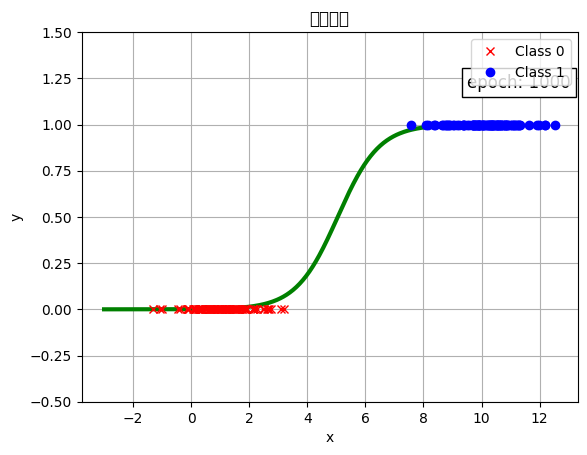

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# データの生成
np.random.seed(1)
x0 = np.random.randn(100) * 1 + 1
x1 = np.random.randn(100) * 1 + 10

# データにラベルを付ける
y0 = np.zeros(100)
y1 = np.ones(100)

# データを結合する
X = np.concatenate([x0, x1])
y = np.concatenate([y0, y1])
shuffle_ind = np.random.permutation(len(X))
X = X[shuffle_ind]
y = y[shuffle_ind]

# データの分布を確認
plt.figure()
plt.hist(x0, bins=50, alpha=0.5, label='Class 0')
plt.hist(x1, bins=50, alpha=0.5, label='Class 1')
plt.legend()
plt.title('データの分布')
plt.show()

# データの分布を0, 1というラベルとともに確認
plt.figure()
plt.plot(x0, y0, 'rx', label='Class 0')
plt.plot(x1, y1, 'bo', label='Class 1')
plt.ylim([-0.5, 1.5])
plt.grid(True)
plt.legend()
plt.title('ラベル付きデータの分布')
plt.show()

# モデルの作成
def g(x, a, b):
    return 1 / (1 + np.exp(-a * x - b))

# コスト関数
def loss(y, p):
    return -(y * np.log(p) + (1 - y) * np.log(1 - p))

# ランダムな初期化
np.random.seed(1)
a = np.random.randn() * 5
b = np.random.randn() * 5

# 総損失の計算とグラディエント降下法
n_epoch = 1000
total_loss = np.zeros(n_epoch)
a_history = np.zeros(n_epoch)
b_history = np.zeros(n_epoch)
lr = 0.0005

for i_epoch in range(n_epoch):
    a_history[i_epoch] = a
    b_history[i_epoch] = b

    # グラディエントの初期化
    pLpa = 0
    pLpb = 0

    for i in range(len(X)):
        x_i = X[i]
        y_i = y[i]
        temp_p = g(x_i, a, b)
        # 損失の計算
        total_loss[i_epoch] += loss(y_i, temp_p)

        # グラディエント降下法
        pLpa += (temp_p - y_i) * x_i  # partial L partial a
        pLpb += (temp_p - y_i)  # partial L partial b

    # 更新
    a = a - lr * pLpa
    b = b - lr * pLpb

# 学習後の結果確認
plt.figure()
plt.plot(x0, y0, 'rx', label='Class 0')
plt.plot(x1, y1, 'bo', label='Class 1')
plt.ylim([-0.5, 1.5])
plt.grid(True)
xx = np.linspace(-3, 11, 500)
plt.plot(xx, g(xx, a_history[-1], b_history[-1]), label='Learned Boundary')
plt.legend()
plt.title('学習後の決定境界')
plt.show()

# 学習過程の確認
plt.figure()
plt.ylim([-0.5, 1.5])
plt.grid(True)
xx = np.linspace(-3, 11, 500)

for i in range(len(a_history)):
    clear_output(wait=True)
    plt.clf()
    plt.ylim([-0.5, 1.5])
    plt.grid(True)
    plt.plot(xx, g(xx, a_history[i], b_history[i]), 'g-', linewidth=3)
    plt.plot(x0, y0, 'rx', label='Class 0')
    plt.plot(x1, y1, 'bo', label='Class 1')
    plt.text(9.5, 1.2, f'epoch: {i+1}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('学習過程')
    plt.legend()
    plt.pause(0.01)
